In [25]:
import pandas as pd
from matplotlib import pyplot as plt
import re

In [17]:
launches = pd.read_csv('CSV/Launches Full.csv')
orgs = pd.read_csv('csv/Orgs.csv')
codes = pd.read_csv('csv/CountryCodes.csv')
satcat = pd.read_csv('csv/satcat.csv')

In [18]:
launches['Apogee'] = pd.to_numeric(launches['Apogee'], errors = 'coerce')
launches = launches[launches['Apogee'] >=100 ] # 100 is the Karman line
launches = launches[launches['Category'] != 'Not real'] # 2 Not Real values to be ommited.(i.e. unverified readings e.t.c)
launches.LaunchCode = launches.LaunchCode.str.replace('(OS)[0-9]*', 'OS', regex = True).replace('(OF)[0-9]*', 'OF', regex = True) #Grouping Failed and successful Launches.
launches.LaunchCode.astype('category', inplace = True) 
launches.reset_index(drop = True, inplace = True)
launches = launches.merge(orgs[['StateCode', 'Class']], left_on = 'Agency', right_on = orgs.Code, how = 'left') # Adding Country and Entity identifiers from the orgs dataset
launches = launches.merge(codes['Name'], left_on = 'StateCode', right_on = codes.Code, how = 'left') # Adding country names
launches.rename(columns = {'Name' : 'Country'}, inplace = True)
print(launches.shape)

(24099, 28)


In [19]:
launches.columns

Index(['LaunchTag', 'JulianDate', 'Date', 'Year', 'LVType', 'Variant',
       'FlightId', 'Flight', 'Mission', 'FlightCode', 'Platform', 'LaunchSite',
       'LaunchPad', 'Apogee', 'Apoflag', 'Range', 'RangeFlag', 'Dest',
       'Agency', 'LaunchCode', 'Group', 'Category', 'Citation1', 'Citation2',
       'Notes', 'StateCode', 'Class', 'Country'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24099 entries, 0 to 24098
Data columns (total 28 columns):
LaunchTag     24099 non-null object
JulianDate    24099 non-null float64
Date          24099 non-null object
Year          24099 non-null int64
LVType        24099 non-null object
Variant       1696 non-null object
FlightId      18902 non-null object
Flight        19876 non-null object
Mission       10433 non-null object
FlightCode    2236 non-null object
Platform      2591 non-null object
LaunchSite    24099 non-null object
LaunchPad     13437 non-null object
Apogee        24099 non-null float64
Apoflag       11815 non-null object
Range         677 non-null object
RangeFlag     164 non-null object
Dest          4100 non-null object
Agency        24099 non-null object
LaunchCode    24099 non-null object
Group         8392 non-null object
Category      24057 non-null object
Citation1     24096 non-null object
Citation2     8126 non-null object
Notes         520 non-null object
St

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [47]:
launches[launches != '-'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24099 entries, 0 to 24098
Data columns (total 28 columns):
LaunchTag     24099 non-null object
JulianDate    24099 non-null float64
Date          24099 non-null object
Year          24099 non-null int64
LVType        24099 non-null object
Variant       1696 non-null object
FlightId      18902 non-null object
Flight        19876 non-null object
Mission       10433 non-null object
FlightCode    2236 non-null object
Platform      2591 non-null object
LaunchSite    24099 non-null object
LaunchPad     13437 non-null object
Apogee        24099 non-null float64
Apoflag       11815 non-null object
Range         677 non-null object
RangeFlag     164 non-null object
Dest          4100 non-null object
Agency        24099 non-null object
LaunchCode    24099 non-null object
Group         8392 non-null object
Category      24057 non-null object
Citation1     24096 non-null object
Citation2     8126 non-null object
Notes         520 non-null object
St

I can see that Apoflag and Rangeflag are the only columns with non null values. But printing out the head below shows most empty rows have a '-' to signify null.

In [21]:
launches.head()

,LaunchTag,JulianDate,Date,Year,LVType,Variant,FlightId,Flight,Mission,FlightCode,...,Agency,LaunchCode,Group,Category,Citation1,Citation2,Notes,StateCode,Class,Country
0,1944-S28,2431241.5,1944 Jun,1944,V-2,-,-,Vertical test,-,-,...,WEHR,MS,-,Test,Neufeld/220,-,-,DR,D,Germany
1,1944-S313,2431241.5,1944 Jun,1944,V-2,-,-,Vertical test,-,-,...,WEHR,MS,-,Test,DeMaes,-,-,DR,D,Germany
2,1944-S314,2431241.5,1944 Jun,1944,V-2,-,-,Vertical test,-,-,...,WEHR,MS,-,Test,DeMaes,-,-,DR,D,Germany
3,1944-S315,2431241.5,1944 Jun,1944,V-2,-,-,Vertical test,-,-,...,WEHR,MS,-,Test,DeMaes,-,-,DR,D,Germany
4,1944-S316,2431241.5,1944 Jun,1944,V-2,-,-,Vertical test,-,-,...,WEHR,MS,-,Test,DeMaes,-,-,DR,D,Germany


In [48]:
launches[launches != '-'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24099 entries, 0 to 24098
Data columns (total 28 columns):
LaunchTag     24099 non-null object
JulianDate    24099 non-null float64
Date          24099 non-null object
Year          24099 non-null int64
LVType        24099 non-null object
Variant       1696 non-null object
FlightId      18902 non-null object
Flight        19876 non-null object
Mission       10433 non-null object
FlightCode    2236 non-null object
Platform      2591 non-null object
LaunchSite    24099 non-null object
LaunchPad     13437 non-null object
Apogee        24099 non-null float64
Apoflag       11815 non-null object
Range         677 non-null object
RangeFlag     164 non-null object
Dest          4100 non-null object
Agency        24099 non-null object
LaunchCode    24099 non-null object
Group         8392 non-null object
Category      24057 non-null object
Citation1     24096 non-null object
Citation2     8126 non-null object
Notes         520 non-null object
St

This gives a better estimate of non null collumns to be used for counts.

In [41]:
Nasa = launches[launches.Agency == 'NASA'] # Creating Dataframe to identify trends in Nasa launches

In [56]:
Nasa.describe(include = 'all')

,LaunchTag,JulianDate,Date,Year,LVType,Variant,FlightId,Flight,Mission,FlightCode,...,Agency,LaunchCode,Group,Category,Citation1,Citation2,Notes,StateCode,Class,Country
count,2908,2.908000e+03,2908,2908.000000,2908,2908,2908,2908,2908,2908,...,2908,2908,2908,2908,2908,2908,2908,2908,2908,2908
unique,2896,NaN,2880,NaN,136,11,2795,1880,431,5,...,1,11,624,172,308,314,23,1,1,1
top,1961-F01,NaN,1979 Nov 1,NaN,Nike Apache,-,-,-,-,-,...,NASA,SS,-,Aeronomy,WDCRF,-,-,US,C,United States
freq,2,NaN,3,NaN,494,2868,43,661,2376,2904,...,2908,2235,485,693,1355,2042,2863,2908,2908,2908
mean,NaN,2.442451e+06,NaN,1974.643398,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,4.213130e+03,NaN,11.561195,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2.436568e+06,NaN,1959.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.439266e+06,NaN,1966.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.441026e+06,NaN,1971.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2.444991e+06,NaN,1982.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A lot of their launches seem to have happened in the first 30 years. I'll plot a histogram to check this further.

In [70]:
Nasa.Year.value_counts().shape


(54,)

In [78]:
Nasa.Year.value_counts()

1965    186
1966    169
1968    167
1964    157
1967    153
1971    137
1970    135
1969    129
1963     98
1972     81
1973     81
1975     75
1962     75
1961     75
1974     68
1990     63
1983     62
1976     60
1978     60
1960     59
1977     57
1979     54
2003     50
1982     47
1980     44
1985     43
1992     43
1981     43
1994     38
1984     38
1997     37
1987     33
1991     31
1988     31
1993     30
1986     25
1989     24
1995     20
1959     16
1999     13
1996     11
1998     11
2001     11
2002     11
2000      8
2006      8
2005      8
2007      8
2009      7
2008      6
2010      5
2011      4
2004      2
2012      1
Name: Year, dtype: int64

(array([ 16.,  59.,  75.,  75.,  98., 157., 186., 169., 153., 167., 129.,
        135., 137.,  81.,  81.,  68.,  75.,  60.,  57.,  60.,  54.,  44.,
         43.,  47.,  62.,  38.,  43.,  25.,  33.,  31.,  24.,  63.,  31.,
         43.,  30.,  38.,  20.,  11.,  37.,  11.,  13.,   8.,  11.,  11.,
         50.,   2.,   8.,   8.,   8.,   6.,   7.,   5.,   4.,   1.]),
 array([1959.        , 1959.98148148, 1960.96296296, 1961.94444444,
        1962.92592593, 1963.90740741, 1964.88888889, 1965.87037037,
        1966.85185185, 1967.83333333, 1968.81481481, 1969.7962963 ,
        1970.77777778, 1971.75925926, 1972.74074074, 1973.72222222,
        1974.7037037 , 1975.68518519, 1976.66666667, 1977.64814815,
        1978.62962963, 1979.61111111, 1980.59259259, 1981.57407407,
        1982.55555556, 1983.53703704, 1984.51851852, 1985.5       ,
        1986.48148148, 1987.46296296, 1988.44444444, 1989.42592593,
        1990.40740741, 1991.38888889, 1992.37037037, 1993.35185185,
        1994.33333333,

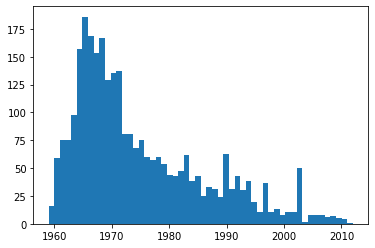

In [77]:
plt.hist(Nasa.Year, bins = 54)

In [24]:
launches[launches.LaunchCode.isin(['OF', 'OS'])].shape

(5657, 28)

In [93]:
launches.Agency.unique().shape

(271,)

Getting quartile data

In [92]:
launches = launches.sort_values(by = 'JulianDate')

In [94]:
print(launches.describe().JulianDate['25%'], launches.describe().JulianDate['75%'], launches.describe().JulianDate['50%'])

2439348.17 2446915.9299999997 2442096.92


In [95]:
launchesBottom25 = launches[launches.JulianDate<=(launches.describe().JulianDate['25%'])]
launchesTop25 = launches[launches.JulianDate>(launches.describe().JulianDate['75%'])]
launchesFailed = launches[launches.LaunchCode.isin(['OF', 'SF', 'MF', 'HF', 'TF', 'RF'])]
launchesFailedBottom25 = launchesBottom25[launchesBottom25.LaunchCode.isin(['OF', 'SF', 'MF', 'HF', 'TF', 'RF'])]
launchesFailedTop25 = launchesTop25[launchesTop25.LaunchCode.isin(['OF', 'SF', 'MF', 'HF', 'TF', 'RF'])]

In [96]:
print(launchesFailed.shape, launchesFailedBottom25.shape, launchesFailedTop25.shape)

(821, 28) (331, 28) (205, 28)


In [97]:
launches.head(20)

,LaunchTag,JulianDate,Date,Year,LVType,Variant,FlightId,Flight,Mission,FlightCode,...,Agency,LaunchCode,Group,Category,Citation1,Citation2,Notes,StateCode,Class,Country
0,1944-S28,2431241.50,1944 Jun,1944,V-2,-,-,Vertical test,-,-,...,WEHR,MS,-,Test,Neufeld/220,-,-,DR,D,Germany
1,1944-S313,2431241.50,1944 Jun,1944,V-2,-,-,Vertical test,-,-,...,WEHR,MS,-,Test,DeMaes,-,-,DR,D,Germany
2,1944-S314,2431241.50,1944 Jun,1944,V-2,-,-,Vertical test,-,-,...,WEHR,MS,-,Test,DeMaes,-,-,DR,D,Germany
3,1944-S315,2431241.50,1944 Jun,1944,V-2,-,-,Vertical test,-,-,...,WEHR,MS,-,Test,DeMaes,-,-,DR,D,Germany
4,1944-S316,2431241.50,1944 Jun,1944,V-2,-,-,Vertical test,-,-,...,WEHR,MS,-,Test,DeMaes,-,-,DR,D,Germany
5,1944-S317,2431261.50,1944 Jun 20?,1944,V-2,-,-,Vertical test,-,-,...,WEHR,MS,-,Test,DeMaes,-,-,DR,D,Germany
6,1944-S95,2431347.50,1944 Sep 14,1944,V-2,-,-,Vertical test,-,-,...,WEHR,MS,-,Test,VonBraun58-8,-,-,DR,D,Germany
7,1944-S279,2431432.21,1944 Dec 7 1700,1944,V-2,-,19874,Ma333,-,-,...,WEHR,MS,-,Test,FE175,-,-,DR,D,Germany
8,1944-S284,2431434.22,1944 Dec 9 1710,1944,V-2,-,19020,-,-,-,...,WEHR,MS,-,Test,FE175,-,-,DR,D,Germany
9,1946-S01,2431951.39,1946 May 10 2115,1946,V-2,-,3,-,-,-,...,WSPG,SS,APL/,CR,Hermes-Rpt,-,-,US,D,United States


In [13]:
launches.Class.unique()

array(['D', 'B', 'A', 'C'], dtype=object)

In [14]:
print('B :',launches[launches.Class == 'B'].Class.shape[0], 'D :',launches[launches.Class == 'D'].Class.shape[0], 'A :',launches[launches.Class == 'A'].Class.shape[0],'C :',launches[launches.Class == 'C'].Class.shape[0],)

B : 1507 D : 15331 A : 73 C : 7188


In [15]:
launches[launches.Class == 'B'].Year.describe()

count    1507.000000
mean     1999.495687
std        16.254997
min      1946.000000
25%      1993.000000
50%      2003.000000
75%      2012.000000
max      2019.000000
Name: Year, dtype: float64

In [16]:
launches.Year.describe()

count    24099.000000
mean      1977.951824
std         15.925845
min       1944.000000
25%       1966.000000
50%       1974.000000
75%       1987.000000
max       2019.000000
Name: Year, dtype: float64

In [17]:
launches.Country.unique()

array(['Germany', 'United States', 'Russia', 'France', 'Australia',
       'United Kingdom', 'Canada', 'Japan', 'China', 'Italy', 'Turkey',
       'Pakistan', 'Sweden', 'Norway', 'European Space Agency',
       'Argentina', 'India', 'Brazil', 'Lebanon', 'Switzerland', 'Spain',
       'Denmark', 'Egypt', 'Iraq', 'Iran', 'Libya', 'Israel',
       'South Africa', 'North Korea', 'Syrian Arab Republic', 'Yemen',
       'South Korea', 'Taiwan', 'Indonesia', 'New Zealand'], dtype=object)

In [18]:
launches.Country.value_counts()[0:12]

United States     10459
Russia             8878
France              733
Germany             489
China               480
Japan               460
United Kingdom      442
India               328
Canada              297
Australia           289
Iraq                235
Spain               182
Name: Country, dtype: int64

In [19]:
launches[launches.Year >= 1999].shape

(3229, 28)

In [33]:
launches[launches.Agency == 'NASA'].Class.value_counts()

C    2908
Name: Class, dtype: int64

In [20]:
launches[launches.Year <1965].shape

(4617, 28)

In [21]:
launches[launches.Year >=1999].Country.value_counts().head(5)

United States    1309
Russia            726
China             319
France            193
India             161
Name: Country, dtype: int64

In [22]:
launches[launches.Year <1965].Country.value_counts().head(5)

United States    2520
Russia           1677
France            130
Australia         119
Canada             43
Name: Country, dtype: int64

In [87]:
launches[launches.Year == 2018].shape

(202, 28)

In [112]:
launches[launches.Year == 2018].Class.value_counts()

B    76
C    70
D    55
A     1
Name: Class, dtype: int64

In [98]:
first30 = launches[launches.Year < 1975]

In [99]:
first20 = launches[launches.Year < 1964]

In [103]:
mid20 = launches[launches.Year.between(1964 ,  1984)]

In [101]:
last30 = launches[launches.Year >1988]

In [44]:
first30.shape

(12601, 28)

In [65]:
first20.shape

(5497, 28)

In [45]:
last30.shape

(5443, 28)

In [69]:
mid20.shape

(2051, 28)

In [59]:
first20.Class.value_counts()

D    2700
C     360
A      57
B      22
Name: Class, dtype: int64

In [46]:
first30.Class.value_counts()

D    8891
C    3449
B     197
A      64
Name: Class, dtype: int64

In [47]:
last30.Class.value_counts()

D    2292
C    1895
B    1249
A       7
Name: Class, dtype: int64

In [28]:
war = launches[launches.Year<1991]
war.Class.value_counts()

D    13401
C     5502
B      307
A       66
Name: Class, dtype: int64

In [29]:
postwar = launches[launches.Year>1991]
postwar.Class.value_counts()

D    1787
C    1535
B    1178
A       7
Name: Class, dtype: int64

In [104]:

mid20.Class.value_counts()

D    8848
C    4434
B     212
A       8
Name: Class, dtype: int64

In [105]:
mid20.shape

(13502, 28)

In [108]:
satcat.shape

(44541, 13)

(19353, 13)